# Остовные деревья

Остовное дерево - это дерево, подграф данного графа, с тем же числом вершин, что и у исходного графа. Остовное дерево получается из исходного графа удалением максимального числа рёбер, входящих в циклы, но без нарушения связности графа. 

# Свойства

• Любое остовное дерево в графе с N вершинами содержит ровно N-1 ребро.

• Число остовных деревьев в полном графе на N вершинах равно 
image.png  (формула Кэли)

• Число остовных деревьев в полном двудольном графе K(m,n) равно 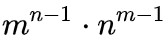

# Алгоритм Прима

На вход алгоритма подаётся связный неориентированный граф. Для каждого ребра задаётся его стоимость.

Сначала берётся произвольная вершина и находится ребро, инцидентное данной вершине и обладающее наименьшей стоимостью. Найденное ребро и соединяемые им две вершины образуют дерево. Затем, рассматриваются рёбра графа, один конец которых — уже принадлежащая дереву вершина, а другой — нет; из этих рёбер выбирается ребро наименьшей стоимости. Выбираемое на каждом шаге ребро присоединяется к дереву. Рост дерева происходит до тех пор, пока не будут исчерпаны все вершины исходного графа.

Результатом работы алгоритма является остовное дерево минимальной стоимости.

Рассмотрим граф с началом в точке D:

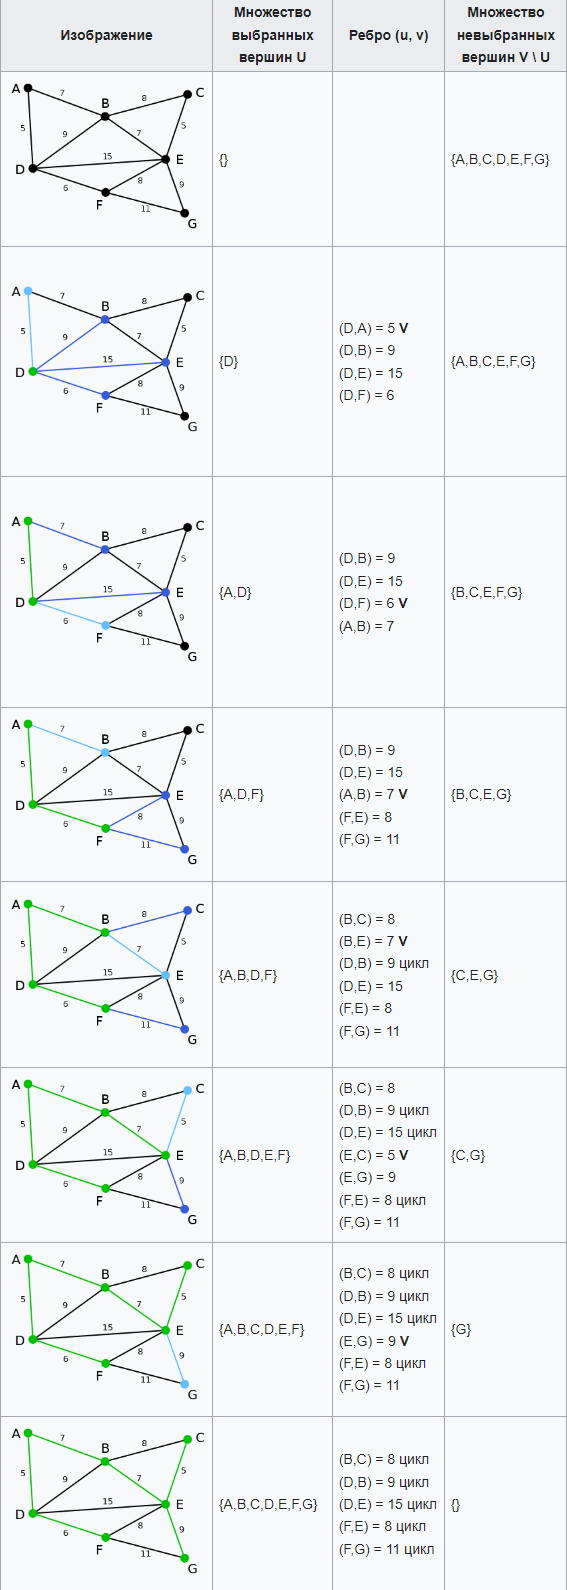

Зелёными линиями обозначен необходимый нам подграф. Ниже приведён пример кода, с помощью которого можно найти рёбра заданного графа, которые образуют остовное дерево с минимальным весом.


In [1]:

import math


def get_min(R, U):
    rm = (math.inf, -1, -1)
    for v in U:
        rr = min(R, key=lambda x: x[0] if (x[1] == v or x[2] == v) and (x[1] not in U or x[2] not in U) else math.inf)
        if rm[0] > rr[0]:
            rm = rr

    return rm


# список ребер графа (длина, вершина 1, вершина 2)
# первое значение возвращается, если нет минимальных ребер
R = [(math.inf, -1, -1), (7, 1, 2), (5, 1, 4), (8, 2, 3), (9, 2, 4), (7, 2, 5),
     (5, 3, 5), (15, 4, 5), (6, 4, 6), (8, 5, 6), (9, 5, 7), (11, 6, 7)]

N = 7     # число вершин в графе
U = {4}   # множество соединенных вершин
T = []    # список ребер остова

while len(U) < N:
    r = get_min(R, U)       # ребро с минимальным весом
    if r[0] == math.inf:    # если ребер нет, то остов построен
        break

    T.append(r)             # добавляем ребро в остов
    U.add(r[1])             # добавляем вершины в множество U
    U.add(r[2])

print(T)                    # вывод рёбер остовного графа

[(5, 1, 4), (6, 4, 6), (7, 1, 2), (7, 2, 5), (5, 3, 5), (9, 5, 7)]
